In [6]:
import json
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from FL_HE_2.lrClass import LR
from FL_HE_2.dataFunction import *
from FL_HE_2.FL_utils import *
from FL_HE_2.HE_functions import *
from FL_HE_2.lrClass import LR
from FL_HE_2.simulationDataUtils import *
from scipy.ndimage import gaussian_filter1d
import math

In [15]:
def read_results_file( file: str, acc=False) -> list:
    new_data = []
    total_kl= []
    total_acc = []
    mean_dist = []
    df = pd.DataFrame()
    
    with open(file, 'r') as f:
        json_data = json.load(f)
        # analytical_loss_local = 0
        # analytical_loss_global = 0
        kl_dv = []
        mean_dist = []
        acc_mean = []
        epsilon_sigma = []
        n_clients = []
        CI = []
        kl_y = []
        for i in range(len(json_data)):
            iteration_number = json_data[str(i)]
            parameters = json_data[str(i)]['parameters']
            # clients_1 = json_data[str(i)]['parameters']['n_clients']
            # clients_2 = json_data[str(i+1)]['parameters']['n_clients']
            # features_1 = json_data[str(i)]['parameters']['n_features']
            # features_2 = json_data[str(i+1)]['parameters']['n_features']

            # df.total_kl = 
            # total_kl.append(json_data[str(i)]['results']['KL_mean'])
            # total_acc.append(json_data[str(i)]['results']['acc_mean'])
            # mean_dist.append(json_data[str(i)]['parameters']['mean_dist'])
            # if clients_1 == clients_2 and features_1 == features_2:
            kl_dv.append(json_data[str(i)]['results']['KL_mean'])
            mean_dist.append(json_data[str(i)]['parameters']['mean_dist'])
            acc_mean.append(json_data[str(i)]['results']['acc_mean'])
            epsilon_sigma.append(json_data[str(i)]['parameters']['epsilon_sigma'])
            n_clients.append(json_data[str(i)]['parameters']['n_clients'])
            if acc:
                CI.append(json_data[str(i)]['results']['acc_CI_mean'])
            kl_y.append(json_data[str(i)]['results']["KL_y_mean"])
            # new_data.append([parameters, kl_dv, mean_dist, acc_mean])
            # total_kl.append(kl_dv)
            # total_acc.append(acc_mean)
            # if iteration_number == -1:
            #     analytical_loss_local = json_data[i]['loss']['params_local']['data_local']['mean']
            #     analytical_loss_global = json_data[i]['loss']['params_global']['data_global']
            # else:
                # new_data.append([iteration_number,
                #                  analytical_loss_local,
                #                  analytical_loss_global,
                #                  json_data[i]['loss']['params_local']['data_local']['mean'],
                #                  json_data[i]['loss']['params_global']['data_local'],
                #                  json_data[i]['loss']['params_global']['data_global']])
    df['n_clients'] = n_clients
    df['mean_dist'] = mean_dist
    df['epsilon_sigma'] = epsilon_sigma
    df['total_acc'] = acc_mean
    df['total_kl'] = kl_dv
    df['kl_y']=kl_y
    if acc:
        df['CI'] = CI
    
    
    # if df.size > 0:
    #     df = np.dstack((df, np.array(new_data)))
    # else:
    #     df = np.array(new_data)

    return df

In [16]:

def plot_loss_functions(fig_name: str, df_cl, df_fl):
    plt.figure()
    plt.loglog(df_cl[:, 0], df_cl[:, 1], label='CL: optimal loss, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 2], label='CL: optimal loss, global data')
    plt.loglog(df_cl[:, 0], df_cl[:, 3], label='CL: local model, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 4], label='CL: global model, local data')
    plt.loglog(df_cl[:, 0], df_cl[:, 5], label='CL: global model, global data')
    plt.loglog(df_fl[:, 0], df_fl[:, 1], label='FL: optimal loss, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 2], label='FL: optimal loss, global data')
    plt.loglog(df_fl[:, 0], df_fl[:, 3], label='FL: local model, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 4], label='FL: global model, local data')
    plt.loglog(df_fl[:, 0], df_fl[:, 5], label='FL: global model, global data')
    plt.title('Loss function vs. outer iterations')
    plt.xlabel('Outer iterations')
    plt.ylabel('Loss value')
    plt.legend()
    plt.savefig(fig_name, format='png')




In [17]:
df = read_results_file('Results/total_dict_2022-06-30 08:24:59.190329.json', False)

In [18]:
df_new = read_results_file('Results/total_dict_2022-07-02 02:04:36.481689.json', True)

In [19]:
df2 = read_results_file('Results/total_dict_2022-07-03 14:32:07.327613.json', True)

In [ ]:
dfy = read_results_file('Results/total_dict_2022-07-08 02:15:55.978727.json', False)

In [47]:
df2

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl,CI
0,2,1.1,10,0.6849,5.884953,"[nan, nan]"
1,5,1.1,10,0.7203,6.041761,"[nan, nan]"
2,10,1.1,10,0.7381,5.937610,"[0.7323411123051273, 0.738024886117972]"
3,20,1.1,10,0.7534,6.776029,"[nan, nan]"
4,30,1.1,10,0.7497,6.963939,"[nan, nan]"
5,40,1.1,10,0.7507,6.937028,"[nan, nan]"
6,50,1.1,10,0.7577,7.119118,"[0.7523933714530606, 0.7579526286640026]"
7,60,1.1,10,0.7543,7.145436,"[0.7483149993674232, 0.7545549952252432]"
8,70,1.1,10,0.7644,7.184358,"[0.7582260128881674, 0.764627985021855]"
9,80,1.1,10,0.7590,7.239922,"[0.752379241879669, 0.7591127547424165]"


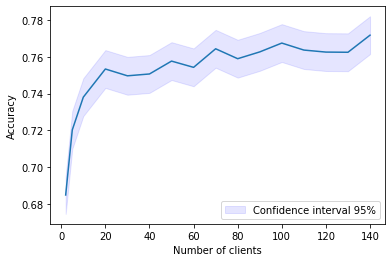

In [105]:
# ysmoothed = gaussian_filter1d( df2.total_acc, sigma=0.6)
# ysmoothed
# plt.plot(df2.n_clients, ysmoothed)
ci = 1.96 * np.std(df2.total_acc)/np.sqrt(len(df2.total_acc))
fig, ax = plt.subplots()
ax.plot(df2.n_clients, df2.total_acc)
ax.fill_between(df2.n_clients, (df2.total_acc-ci), (df2.total_acc+ci), color='b', alpha=.1, label='Confidence interval 95%')
plt.ylabel('Accuracy')
plt.xlabel('Number of clients')
plt.legend( loc='lower right')
plt.savefig('images/Accuracy,N_clients,CI',bbox_inches='tight',  dpi=300)
plt.savefig('/Users/romyho/Documents/Master_Econometrie/Thesis/Thesis_latex/images/Accuracy,N_clients,CI',bbox_inches='tight',  dpi=300)
plt.show()

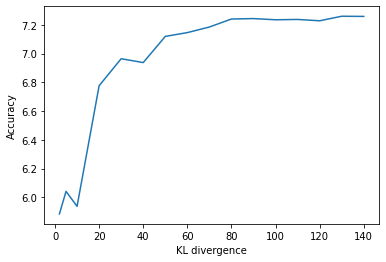

In [38]:
# plt.plot(df2.n_clients, ysmoothed)
plt.plot(df2.n_clients, df2.total_kl)
plt.ylabel('Accuracy')
plt.xlabel('KL divergence')
# plt.savefig('/images/Accuracy,KL,epsilonSigma',bbox_inches='tight',  dpi=300)
# plt.savefig('/Users/Romy/Documents/Master Thesis/Thesis_latex/images/Accuracy,KL,epsilonSigma',bbox_inches='tight',  dpi=300)
plt.show()

In [54]:
1.96 * np.std(df2.total_kl)/np.sqrt(len(df2.total_kl))

0.23630227537392887

In [84]:
ci = []
for i,v in enumerate(df2.CI):
    if math.isnan(v[0]):
        # print(i)
        ci_val = 1.96 * np.std(df2.total_kl)/np.sqrt(len(df2.total_kl))
        ci.append([df2.total_kl[i] - ci_val, df2.total_kl[i] + ci_val])
    else:
        ci.append([df2.total_kl[i]- v[0], df2.total_kl[i]+v[1]])
    # print(i)

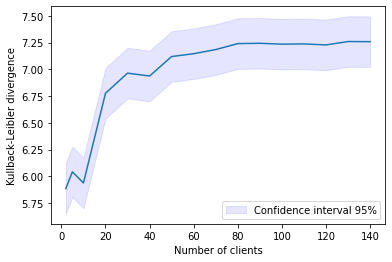

In [106]:
ci = 1.96 * np.std(df2.total_kl)/np.sqrt(len(df2.total_kl))

fig, ax = plt.subplots()
ax.plot(df2.n_clients,df2.total_kl)
ax.fill_between(df2.n_clients, (df2.total_kl-ci), (df2.total_kl+ci), color='b', alpha=.1, label='Confidence interval 95%')
plt.ylabel('Kullback-Leibler divergence')
plt.xlabel('Number of clients')
plt.legend( loc='lower right')

plt.savefig('images/KL,N_clients,CI',bbox_inches='tight',  dpi=300)
plt.savefig('/Users/romyho/Documents/Master_Econometrie/Thesis/Thesis_latex/images/KL,N_clients,CI',bbox_inches='tight',  dpi=300)

plt.show()

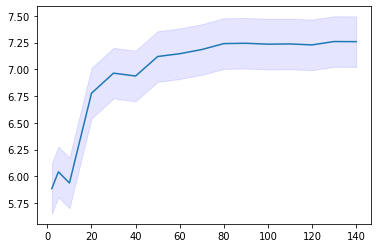

In [122]:
ci = 1.96 * np.std(df2.total_kl)/np.sqrt(len(df2.total_kl))
fig, ax = plt.subplots()
ax.plot(df2.n_clients,df2.total_kl)
ax.fill_between(df2.n_clients, (df2.total_kl-ci), (df2.total_kl+ci), color='b', alpha=.1)

In [ ]:
plt.plot(df2.n_clients, df2.total_kl)
plt.ylabel('Accuracy')
plt.xlabel('KL divergence')

In [4]:
# client_list_begin = np.array([2, 5])
# N_Clients = np.concatenate((client_list_begin, np.arange(10, 150, 10)))


# # N_Clients = np.arange(0.1, 3.0, 0.5)
# N_Features = [15]
# N_Observations = [200]
# mean_distance = [1.1]
# monte_carlo_reps = range(50)
# epsilon_sigmas = [10]
mean_dist = 1.1
n_clients  = 10
n_features = 15
n_observations = 200
epsilon_sigma = 10
glob_model = LR(n_features)

In [117]:
n_client_df

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl
3,2,0.1,100.0,0.5388,0.038842
7,2,0.6,100.0,0.5464,1.398301
11,2,1.1,100.0,0.5518,4.699846
15,2,1.6,100.0,0.5500,9.943476
19,2,2.1,100.0,0.5477,17.129191
23,2,2.6,100.0,0.5398,26.256991
27,5,0.1,100.0,0.5479,0.040425
31,5,0.6,100.0,0.5481,1.455302
35,5,1.1,100.0,0.5519,4.891433
39,5,1.6,100.0,0.5489,10.348816


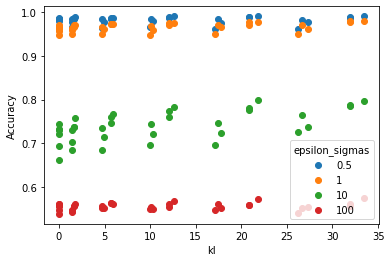

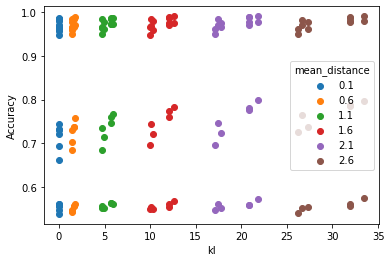

In [120]:
N_Clients = [2,5,10,30, 40, 100]
mean_distance = np.arange(0.1, 3.0, 0.5)
epsilon_sigmas = [0.5, 1, 10, 100]
for m in epsilon_sigmas:
    n_client_df = df[df.epsilon_sigma == m]
    plt.scatter(n_client_df.total_kl, n_client_df.total_acc)
    plt.ylabel('Accuracy')
    plt.xlabel('kl')
plt.legend(epsilon_sigmas, title = 'epsilon_sigmas')
plt.show()
for m in mean_distance:
    n_client_df = df[df.mean_dist == m]
    plt.scatter(n_client_df.total_kl, n_client_df.total_acc)
    plt.ylabel('Accuracy')
    plt.xlabel('kl')
plt.legend(mean_distance, title = 'mean_distance')
plt.show()
# for n in N_Clients:
#     for m in epsilon_sigmas:
#         n_client_df = df[df.n_clients == n]
#         # print(n_client_df.total_acc, n_client_df.total_kl)
#         mean_df = n_client_df[n_client_df.epsilon_sigma == m]
#         plt.scatter( mean_df.total_kl,  mean_df.total_acc,)
#         plt.ylabel('Accuracy')
#         plt.xlabel('KL divergence')
#     plt.title('KL divergence vs Accuracy, n clients:{}'.format(n))
#     # plt.legend(mean_distance, title = 'mean_distance')
#     plt.show()

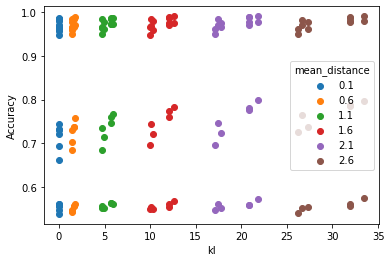

In [119]:
N_Clients = [2,5,10,30, 40, 100]
mean_distance = np.arange(0.1, 3.0, 0.5)
epsilon_sigmas = [0.5, 1, 10, 100]
for m in mean_distance:
    n_client_df = df[df.mean_dist == m]
    plt.scatter(n_client_df.total_kl, n_client_df.total_acc)
    plt.ylabel('Accuracy')
    plt.xlabel('kl')
plt.legend(mean_distance, title = 'mean_distance')
plt.show()
# for n in N_Clients:
#     for m in epsilon_sigmas:
#         n_client_df = df[df.n_clients == n]
#         # print(n_client_df.total_acc, n_client_df.total_kl)
#         mean_df = n_client_df[n_client_df.epsilon_sigma == m]
#         plt.scatter( mean_df.total_kl,  mean_df.total_acc,)
#         plt.ylabel('Accuracy')
#         plt.xlabel('KL divergence')
#     plt.title('KL divergence vs Accuracy, n clients:{}'.format(n))
#     # plt.legend(mean_distance, title = 'mean_distance')
#     plt.show()

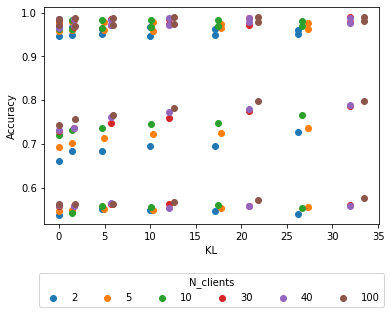

In [24]:
N_Clients = [2,5,10,30, 40, 100]
mean_distance = np.arange(0.1, 3.0, 0.5)
epsilon_sigmas = [0.5, 1, 10, 100]

fig, ax = plt.subplots()

for m in N_Clients:
    n_client_df = df[df.n_clients == m]
    # ci = 1.96 * np.std(n_client_df.total_acc)/np.sqrt(len(n_client_df.total_acc))
    # n_client_df = n_client_df.groupby(['n_clients']).mean()
    ax.scatter(n_client_df.total_kl,n_client_df.total_acc, label=m)
    # ax.fill_between(n_client_df.index, (n_client_df.total_acc-ci), (n_client_df.total_acc+ci), color='b', alpha=.1)
    # plt.plot(n_client_df.n_clients, n_client_df.total_kl, label=m)
plt.ylabel('Accuracy')
plt.xlabel('KL')
plt.legend(title = 'N_clients', loc='upper center', bbox_to_anchor=(0.5, -0.2),
         ncol=6)
# plt.savefig('images/Accuracy,N_clients,epsilonSigma_CI',bbox_inches='tight',  dpi=300)
# plt.savefig('/Users/romyho/Documents/Master_Econometrie/Thesis/Thesis_latex/images/Accuracy,N_clients,epsilonSigma_CI',bbox_inches='tight',  dpi=300)

plt.show()

In [31]:
df2

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl,CI
0,2,1.1,10,0.6849,5.884953,"[nan, nan]"
1,5,1.1,10,0.7203,6.041761,"[nan, nan]"
2,10,1.1,10,0.7381,5.937610,"[0.7323411123051273, 0.738024886117972]"
3,20,1.1,10,0.7534,6.776029,"[nan, nan]"
4,30,1.1,10,0.7497,6.963939,"[nan, nan]"
5,40,1.1,10,0.7507,6.937028,"[nan, nan]"
6,50,1.1,10,0.7577,7.119118,"[0.7523933714530606, 0.7579526286640026]"
7,60,1.1,10,0.7543,7.145436,"[0.7483149993674232, 0.7545549952252432]"
8,70,1.1,10,0.7644,7.184358,"[0.7582260128881674, 0.764627985021855]"
9,80,1.1,10,0.7590,7.239922,"[0.752379241879669, 0.7591127547424165]"


In [35]:
((max(df2.total_acc) - min(df2.total_acc) )/ max(df2.total_acc))*100

11.259393115343938

In [34]:
 min(df2.total_acc)

0.6849000018835067

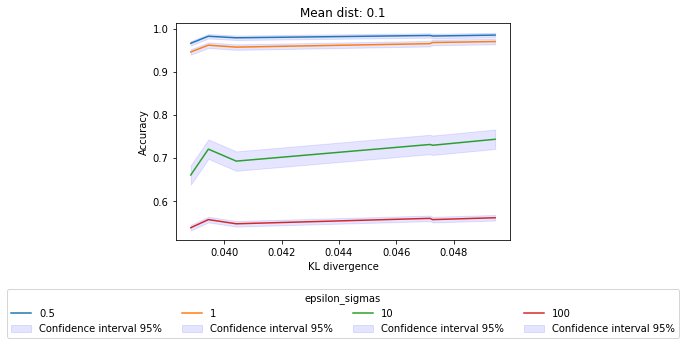

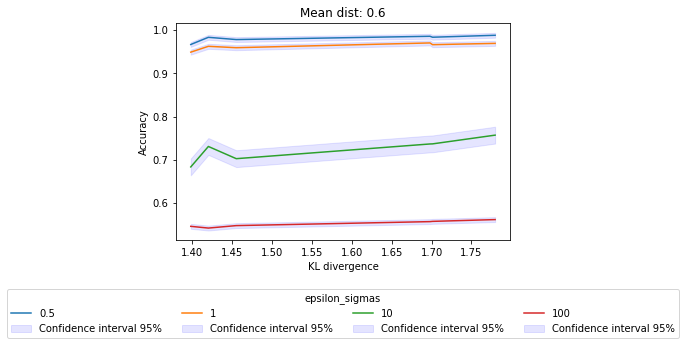

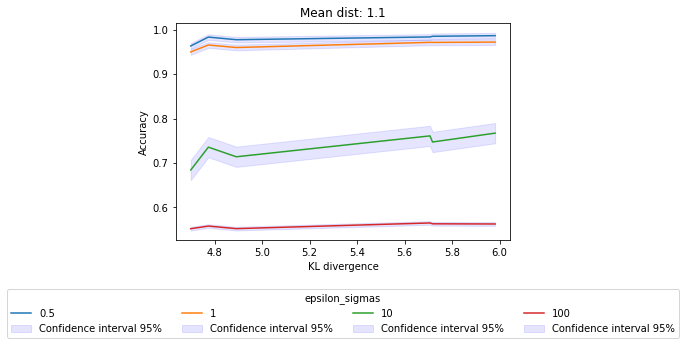

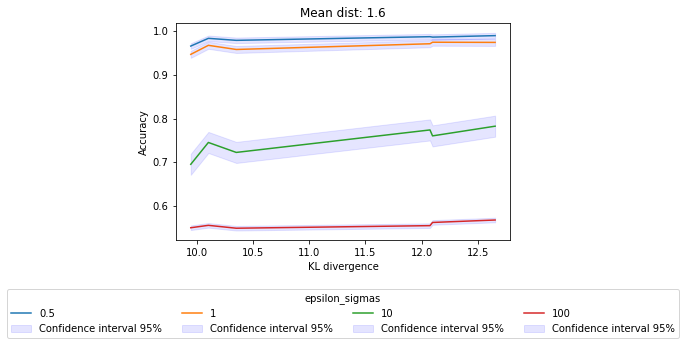

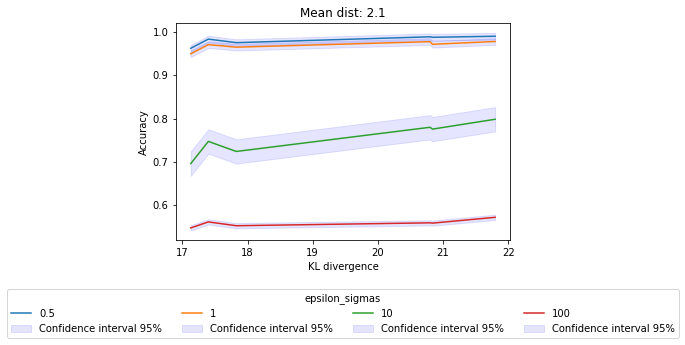

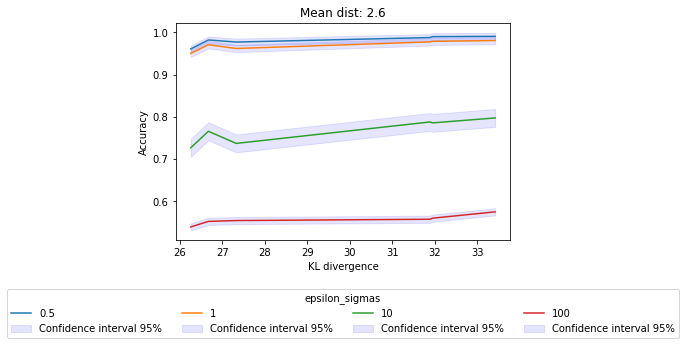

In [115]:
N_Clients = [2,5,10,30, 40, 100]
mean_distance = np.arange(0.1, 3.0, 0.5)
epsilon_sigmas = [0.5, 1, 10, 100]

for m in mean_distance:
    fig, ax = plt.subplots()
    for s in epsilon_sigmas:
        n_client_df = df[df.mean_dist == m]
        s_df = n_client_df[n_client_df.epsilon_sigma == s]
        s_df = s_df.sort_values(by=['total_kl'])
        # print(s_df.total_kl, s_df.total_acc)
        ci = 1.96 * np.std(s_df.total_acc)/np.sqrt(len(s_df.total_acc))
        
        ax.plot(s_df.total_kl, s_df.total_acc, label=s)
        ax.fill_between(s_df.total_kl, (s_df.total_acc-ci), (s_df.total_acc+ci), color='b', alpha=.1, label='Confidence interval 95%')
        # plt.plot(   s_df.total_kl, s_df.total_acc)
    plt.ylabel('Accuracy')
    plt.xlabel('KL divergence')
    plt.title('Mean dist: {}'.format(m))
    plt.legend(title = 'epsilon_sigmas', loc='upper center', bbox_to_anchor=(0.5, -0.2),
         ncol=4)
    # plt.legend(epsilon_sigmas, title = 'epsilon_sigmas', loc='upper center', bbox_to_anchor=(0.5, -0.2),
    #      ncol=4)
    # plt.legend(epsilon_sigmas, title = 'epsilon_sigmas')
    plt.show()

In [197]:
plt.rcParams.update({'font.size':5 })

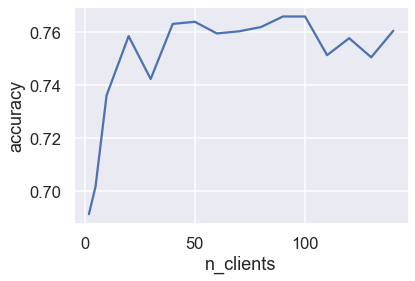

In [342]:
N_Clients = [2,5,10,30, 40, 100]
mean_distance = np.arange(0.1, 3.0, 0.5)
epsilon_sigmas = [0.5, 1, 10, 100]


# for m in epsilon_sigmas:
    # n_client_df = df[df.epsilon_sigma == m]
    

ysmoothed = gaussian_filter1d( n_client_df.total_acc, sigma=15)
    # plt.plot(x, ysmoothed)

plt.plot(  df_new.n_clients, df_new.total_acc)
plt.ylabel('accuracy')
plt.xlabel('n_clients')
# plt.legend(epsilon_sigmas, title = 'epsilon $\sigma$')
plt.show()

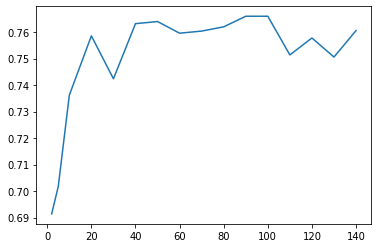

In [14]:
plt.plot(df_new.n_clients, df_new.total_acc )
# plt.ylabel('accuracy')
# plt.xlabel('n_clients')
# plt.legend(epsilon_sigmas, title = 'epsilon $\sigma$')
plt.show()

In [15]:
df_new.total_acc

0     0.6914
1     0.7018
2     0.7362
3     0.7586
4     0.7424
5     0.7632
6     0.7640
7     0.7596
8     0.7604
9     0.7620
10    0.7660
11    0.7660
12    0.7514
13    0.7578
14    0.7506
15    0.7606
Name: total_acc, dtype: float64

In [335]:
d = np.array([2, 5])
dd = np.concatenate((d, np.arange(10, 150, 10)))
dd

array([  2,   5,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110,
       120, 130, 140])

In [331]:
np.arange(10, 150, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])

In [336]:
eps_df = df[df.epsilon_sigma == 10.0]
eps_df[eps_df.mean_dist == 1.1]

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl
10,2,1.1,10.0,0.6841,4.699846
34,5,1.1,10.0,0.7139,4.891433
58,10,1.1,10.0,0.7356,4.773980
82,30,1.1,10.0,0.7472,5.718007
106,40,1.1,10.0,0.7610,5.707206
130,100,1.1,10.0,0.7672,5.981552


In [309]:
df[df.mean_dist == 1.6]

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl
12,2,1.6,0.5,0.9661,9.943476
13,2,1.6,1.0,0.9471,9.943476
14,2,1.6,10.0,0.6953,9.943476
15,2,1.6,100.0,0.5500,9.943476
36,5,1.6,0.5,0.9792,10.348816
37,5,1.6,1.0,0.9583,10.348816
38,5,1.6,10.0,0.7225,10.348816
39,5,1.6,100.0,0.5489,10.348816
60,10,1.6,0.5,0.9838,10.100321
61,10,1.6,1.0,0.9678,10.100321


In [300]:
# n_clients_df = df[df.n_clients == n]
# n_client_df[n_client_df.epsilon_sigma == 100.0]

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl
23,2,2.6,100.0,0.5398,26.256991
47,5,2.6,100.0,0.5549,27.327343
71,10,2.6,100.0,0.5529,26.671161
95,30,2.6,100.0,0.5605,31.945230
119,40,2.6,100.0,0.5580,31.884888
143,100,2.6,100.0,0.5755,33.417595


In [38]:
df2

,n_clients,mean_dist,epsilon_sigma,total_acc,total_kl,CI
0,2,1.1,10,0.6849,5.884953,"[nan, nan]"
1,5,1.1,10,0.7203,6.041761,"[nan, nan]"
2,10,1.1,10,0.7381,5.937610,"[0.7323411123051273, 0.738024886117972]"
3,20,1.1,10,0.7534,6.776029,"[nan, nan]"
4,30,1.1,10,0.7497,6.963939,"[nan, nan]"
5,40,1.1,10,0.7507,6.937028,"[nan, nan]"
6,50,1.1,10,0.7577,7.119118,"[0.7523933714530606, 0.7579526286640026]"
7,60,1.1,10,0.7543,7.145436,"[0.7483149993674232, 0.7545549952252432]"
8,70,1.1,10,0.7644,7.184358,"[0.7582260128881674, 0.764627985021855]"
9,80,1.1,10,0.7590,7.239922,"[0.752379241879669, 0.7591127547424165]"


In [293]:
df_n_clients = pd.DataFrame()
for n in N_Clients:
    df_n_clients[n] = df[df.n_clients == n].total_acc.reset_index(drop=True)
df_n_clients

    

,2,5,10,30,40,100
0,0.9667,0.9794,0.9830,0.9835,0.9848,0.9857
1,0.9466,0.9578,0.9623,0.9685,0.9658,0.9707
2,0.6611,0.6933,0.7211,0.7301,0.7319,0.7440
3,0.5388,0.5479,0.5576,0.5576,0.5605,0.5619
4,0.9667,0.9781,0.9833,0.9835,0.9857,0.9880
5,0.9490,0.9593,0.9625,0.9663,0.9703,0.9693
6,0.6837,0.7028,0.7310,0.7370,0.7368,0.7572
7,0.5464,0.5481,0.5424,0.5579,0.5573,0.5620
8,0.9637,0.9778,0.9837,0.9855,0.9840,0.9869
9,0.9502,0.9602,0.9659,0.9717,0.9718,0.9724


In [292]:
acc = df[df.n_clients == 5].total_acc.reset_index(drop=True)
# acc_r = acc.reindex()
acc

0     0.9794
1     0.9578
2     0.6933
3     0.5479
4     0.9781
5     0.9593
6     0.7028
7     0.5481
8     0.9778
9     0.9602
10    0.7139
11    0.5519
12    0.9792
13    0.9583
14    0.7225
15    0.5489
16    0.9752
17    0.9648
18    0.7241
19    0.5527
20    0.9769
21    0.9617
22    0.7373
23    0.5549
Name: total_acc, dtype: float64

In [62]:
df = read_results_file('Results', 'total_dict_2022-06-23 14:06:31.804913.json')

In [63]:
for i in range(len(kl_total)):
    plt.scatter(acc_total[i], kl_total[i], label = mean_dist[i])
plt.legend(np.unique(mean_dist))
plt.xlabel('Accuracy')
plt.ylabel('KL')
plt.show()

NameError: name 'kl_total' is not defined

In [97]:
df_sort = df.sort_values(by=['epsilon_sigma', 'mean_dist'])

In [115]:
df_sort.groupby(by=['epsilon_sigma','mean_dist']).count().unstack().columns.levels[1]

Float64Index([0.1, 0.6, 1.1, 1.6, 2.1, 2.6], dtype='float64', name='mean_dist')

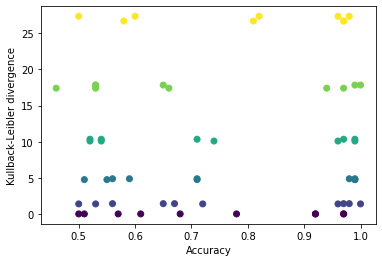

In [109]:
#Getting unique labels
 
u_labels = np.unique(df.epsilon_sigma)

#plotting the results:
for i in u_labels:
    plt.scatter(df_sort[df_sort.epsilon_sigma == i].total_acc , df_sort[df_sort.epsilon_sigma == i].total_kl , c=df_sort[df_sort.epsilon_sigma == i].mean_dist)
    # print(df_sort[df_sort.epsilon_sigma == i].mean_dist)
    # print(df_sort[df_sort.epsilon_sigma == i].epsilon_sigma)
plt.xlabel('Accuracy')
plt.ylabel('Kullback-Leibler divergence')
# plt.legend( np.unique(df_sort.mean_dist), title='Mean distance')
# plt.legend( np.arange(0.1, 3.6, 0.5), title='Mean distance', loc='upper center', bbox_to_anchor=(0.5, -0.2),
#           fancybox=True, shadow=True, ncol=5)
plt.show()

In [112]:
df

,City,Occupation,Blood Type,Dummy
0,Tijuana,Drone security officer,AB,1.0
1,Tijuana,Drone security officer,O,1.0
2,Atlantis,Lawyer,B,1.0
3,Anaheim,Engineer,A,1.0
4,Tijuana,Engineer,A,1.0
...,...,...,...,...
495,Atlantis,Drone security officer,A,1.0
496,Atlantis,Drone security officer,B,1.0
497,Los Angeles,Doctor,B,1.0
498,Atlantis,Engineer,B,1.0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

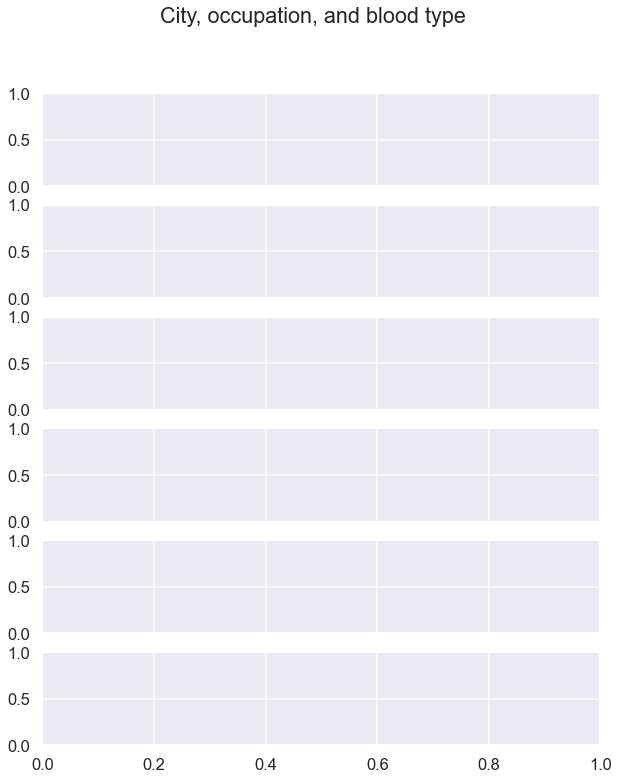

In [120]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import seaborn as sns

# Make data
# cities = ['Tijuana','Las Vegas','Los Angeles','Anaheim','Atlantis']
# occupations = ['Doctor','Lawyer','Engineer','Drone security officer']
# bloodtypes = ['A','B','AB','O']
# df = pd.DataFrame({'City': np.random.choice(cities,500),
#                    'Occupation': np.random.choice(occupations,500),
#                    'Blood Type':np.random.choice(bloodtypes,500)})

# # Make a dummy column, otherwise the groupby returns an empty df
# df['Dummy'] = np.ones(500)

# # This is now what I'd like to plot
# grouped = df.groupby(by=['City','Occupation','Blood Type']).count().unstack()

# List of blood types, to use later as categories in subplots
kinds = np.unique(df_sort.mean_dist)

# colors for bar graph
colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

sns.set(context="talk")
nxplots = len(np.unique(df_sort.mean_dist))
nyplots = 1
fig, axes = plt.subplots(nxplots,
                         nyplots,
                         sharey=True,
                         sharex=True,
                         figsize=(10,12))

fig.suptitle('City, occupation, and blood type')

# plot the data
for a, b in enumerate(np.unique(df_sort.epsilon_sigma)):
    for i, j in enumerate(np.unique(df_sort.mean_dist)):
        axes[a,i].scatter(df_sort[df_sort.epsilon_sigma == b].total_acc , df_sort[df_sort.epsilon_sigma == b].total_kl ,c=j ,color=colors)
        axes[a,i].xaxis.set_ticks([])

axeslabels = fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
axeslabels.set_ylabel('City',rotation='horizontal',y=1,weight="bold")
axeslabels.set_xlabel('Occupation',weight="bold")

# x- and y-axis labels
# for i, j in enumerate(grouped.index.levels[1]):
#     axes[nyplots,i].set_xlabel(j)
# for i, j in enumerate(grouped.index.levels[0]):
#     axes[i,0].set_ylabel(j)

# Tune this manually to make room for the legend
fig.subplots_adjust(right=0.82)

fig.legend([Patch(facecolor = i) for i in colors],
           kinds,
           title="Blood type",
           loc="center right")

In [57]:
np.unique(df_sort.epsilon_sigma)

array([5.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [10]:
# mean_dist_list = np.arange(0.1, 3.0, 0.5)
# with open('Results/total_dict_2022-06-13 13:34:28.347619.json', 'r') as f:
#     json_data = json.load(f)
#     for i in range(len(json_data)):
#         # print(json_data[str(i)]['parameters']['mean_dist'])
#         for m in mean_dist_list:
#             if json_data[str(i)]['parameters']['mean_dist'] == m:
#                 plt.scatter( json_data[str(i)]['results']['acc_mean'], json_data[str(i)]['results']['KL_mean'])
#     plt.legend(mean_dist_list)
#     plt.show()

In [11]:

if __name__ == "__main__":
    directory = os.getcwd()
    if not os.path.isdir('figures'):
        os.makedirs('figures')

    count_fig = 0
    for subdir, dirs, files in os.walk(f'{directory}/results'):
        if 'experiment_' in subdir:
            df_cl = np.array([])
            df_fl = np.array([])
            for file in files:
                if 'fl' in file:
                    df_fl = read_results_file(subdir, file, df_fl)
                elif 'cl' in file:
                    df_cl = read_results_file(subdir, file, df_cl)

            df_fl_mean = np.mean(df_fl, axis=2)
            df_cl_mean = np.mean(df_cl, axis=2)

            plot_loss_functions('figures/fig_experiment_' +
                                str(count_fig) + '.png', df_cl_mean, df_fl_mean)
            count_fig += 1

In [14]:
(0.4699999988079071+0.5+0.6200000047683716+0.5099999904632568+0.5199999809265137)/5

0.5239999949932098

array([ 1.37375522,  1.2551983 , -0.13922887])

In [17]:
np.random.uniform(-1.5, 1.5, 3)

array([-1.41690698,  0.89805302,  0.54647384])